# Multiclass Diabetes Classification Project

Diabetes is a major global health concern affecting millions of individuals worldwide. Early detection and classification of diabetes status can help in timely intervention and management. In this project, I leverage clinical and biochemical features to automatically classify patients into Non-Diabetic, Diabetic, or Predict-Diabetic categories using supervised machine learning techniques.

## Project Overview

This project aims to classify patients into three categories based on their diabetes status using clinical and biochemical features. I train and evaluate several machine learning models using cross-validation and performance on a held-out test set.

The dataset I use comes from [this Kaggle source](https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset).

The notebook is structured as follows:
- Data Loading, Cleaning and Overview
- Exploratory Data Analysis (EDA)
- Class Imbalance Analysis
- Model Training and Cross-Validation (C.V.)
- Model Evaluation on the Test Set
- Conclusion

---

### Feature Dictionary

Below is a clinical explanation of each feature used in this project.

| Feature | Description |
|---------|-------------|
| **Gender** | Biological sex (0 = Female, 1 = Male). Affects diabetes risk due to hormonal/lifestyle differences. |
| **AGE** | Age in years. Risk increases significantly after age 45. |
| **Urea** | Blood urea level (mg/dL). High values may indicate kidney problems, common in diabetes. |
| **Cr (Creatinine)** | Blood creatinine level (mg/dL). Marker of kidney function. Elevated in diabetic nephropathy. |
| **HbA1c** | Glycated hemoglobin (%). Measures average blood glucose over ~3 months. Critical for diagnosis. |
| **Chol** | Total cholesterol (mg/dL). High values raise cardiovascular risk. |
| **TG** | Triglycerides (mg/dL). High levels indicate insulin resistance/metabolic syndrome. |
| **HDL** | "Good" cholesterol (mg/dL). High HDL protects against cardiovascular risk. |
| **LDL** | "Bad" cholesterol (mg/dL). High LDL promotes artery plaque. |
| **VLDL** | Very Low Density Lipoprotein (mg/dL). Transports triglycerides; high levels are unfavorable. |
| **BMI** | Body Mass Index (kg/m²). BMI ≥ 30 indicates obesity, a major diabetes risk factor. |
| **Class** | Target: 0 = Non-Diabetic, 1 = Diabetic, 2 = Predict-Diabetic. Used for classification. |

---
## Library Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Statistical tests
from scipy.stats import f_oneway

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model tools
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)

# Model persistence
import joblib

---
## Data Loading, Cleaning and Overview

In this section, I import the dataset, perform a basic inspection, and check for initial data quality before proceeding with further analysis.

The dataset contains 264 entries and 12 columns, with no missing values. All features are numerical and already in the correct format for analysis, so no immediate type conversion or imputation is required.

In [7]:
df = pd.read_csv("./dataset/Multiclass Diabetes Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [9]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [10]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

---
## Exploratory Data Analysis (EDA)

We explore variable distributions, class imbalance, and feature relationships through visualizations.

### Age Distribution by Class

This histogram with KDE overlay shows how **age** is distributed across the three diabetes classes:

- **Class 0 (Non-Diabetic)**: Most individuals are between **35 and 55 years old**, with a distribution slightly skewed toward younger ages.
- **Class 1 (Diabetic)**: This class appears more evenly spread but remains concentrated around **45 to 55 years old**.
- **Class 2 (Pre-Diabetic)**: The distribution is strongly peaked around **55–60 years old**, with the highest frequency in this age range.

These patterns suggest that **age plays an important role** in diabetes risk, particularly for **pre-diabetic individuals**, where the frequency sharply increases with age.

This observation aligns with medical literature, which identifies age >45 as a significant risk factor. This trend may also help explain why age was found to be a statistically significant variable in the ANOVA test and model performance.

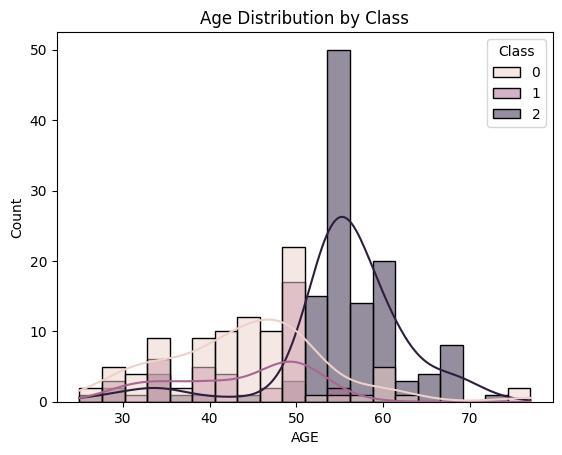

In [ ]:
sns.histplot(data=df, x='AGE', hue='Class', kde=True, bins=20)
plt.title("Age Distribution by Class")
plt.show()

###  Analysis of HbA1c Variance by Class

The boxplot above shows the distribution of **HbA1c** levels across the three diabetes classes:

- **Class 0 (Non-Diabetic)**: Low median HbA1c (~4.7%), with relatively small variance. Outliers remain well below the diabetic threshold.
- **Class 1 (Diabetic)**: HbA1c values are tightly clustered around ~6.0–6.4%, with **very low variance**. This reflects a sharp classification boundary near the diagnostic cutoff.
- **Class 2 (Pre-Diabetic)**: This class shows the **highest variance**, with a wider range from ~4% up to >14%. The broader distribution likely reflects the transitional and heterogeneous nature of pre-diabetes.

The significant variance in **Class 2** suggests that individuals in this group may require more nuanced diagnostic attention.  
This also justifies the use of **HbA1c** as a discriminative feature, confirmed by ANOVA and model importance metrics.

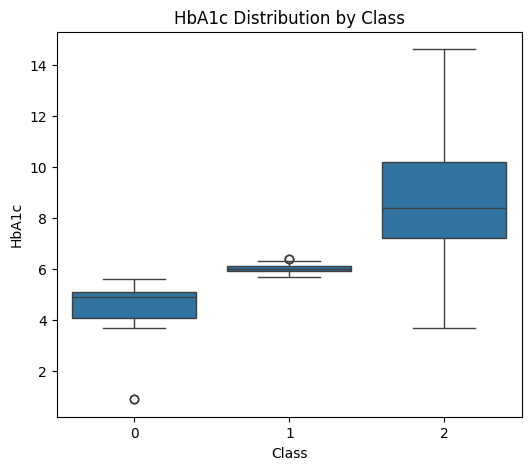

In [12]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Class", y="HbA1c")
plt.title("HbA1c Distribution by Class")
plt.xlabel("Class")
plt.ylabel("HbA1c")
plt.show()

### Correlation Heatmap Insights

This heatmap shows the **Pearson correlation coefficients** between numerical variables, with only the **lower triangle displayed** to avoid redundancy.

#### Key takeaways:

- **HbA1c** and **Class**: The strongest positive correlation (**r = 0.77**), confirming HbA1c as a central predictor of diabetes status.
- **BMI** also demonstrates a strong correlation with **Class** (**r = 0.75**), highlighting the well-known association between obesity and diabetes.
- **Creatinine (Cr)** and **Urea** are strongly correlated (**r = 0.74**), as both reflect kidney function.
- **HDL** shows mild negative correlations with several features, consistent with its protective role in metabolic profiles.

These correlations reinforce the findings from the **EDA**, **ANOVA test**, and model-driven feature importance, supporting the inclusion of variables like **HbA1c**, **BMI**, and **AGE** in the final models.

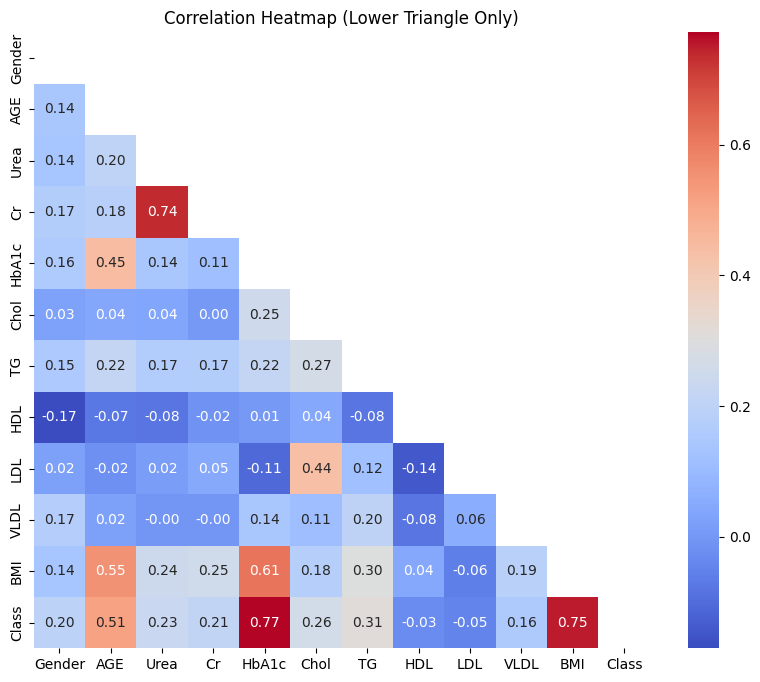

In [13]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Lower Triangle Only)")
plt.show()

### Pairwise Relationships Between Key Features

This pairplot visualizes the distributions and scatter plots of selected features (**AGE, HbA1c, Chol, LDL, BMI**), colored by diabetes class.

#### Key Observations:

- **HbA1c** clearly separates Class 2 (Predict-Diabetic) from the others, with higher values strongly associated with this group.
- **BMI** also shows distinct clustering: individuals in Class 2 tend to have noticeably higher BMI values.
- **Cholesterol (Chol)** and **LDL** exhibit overlapping distributions across classes, but Class 2 tends to be more concentrated in higher ranges.
- **AGE** displays some overlap among all classes, though Class 2 skews older overall.

This visualization reinforces earlier findings and highlights how features like **HbA1c** and **BMI** contribute to class separability. It also justifies the use of ensemble models like **Random Forest**, which can capture these non-linear interactions effectively.

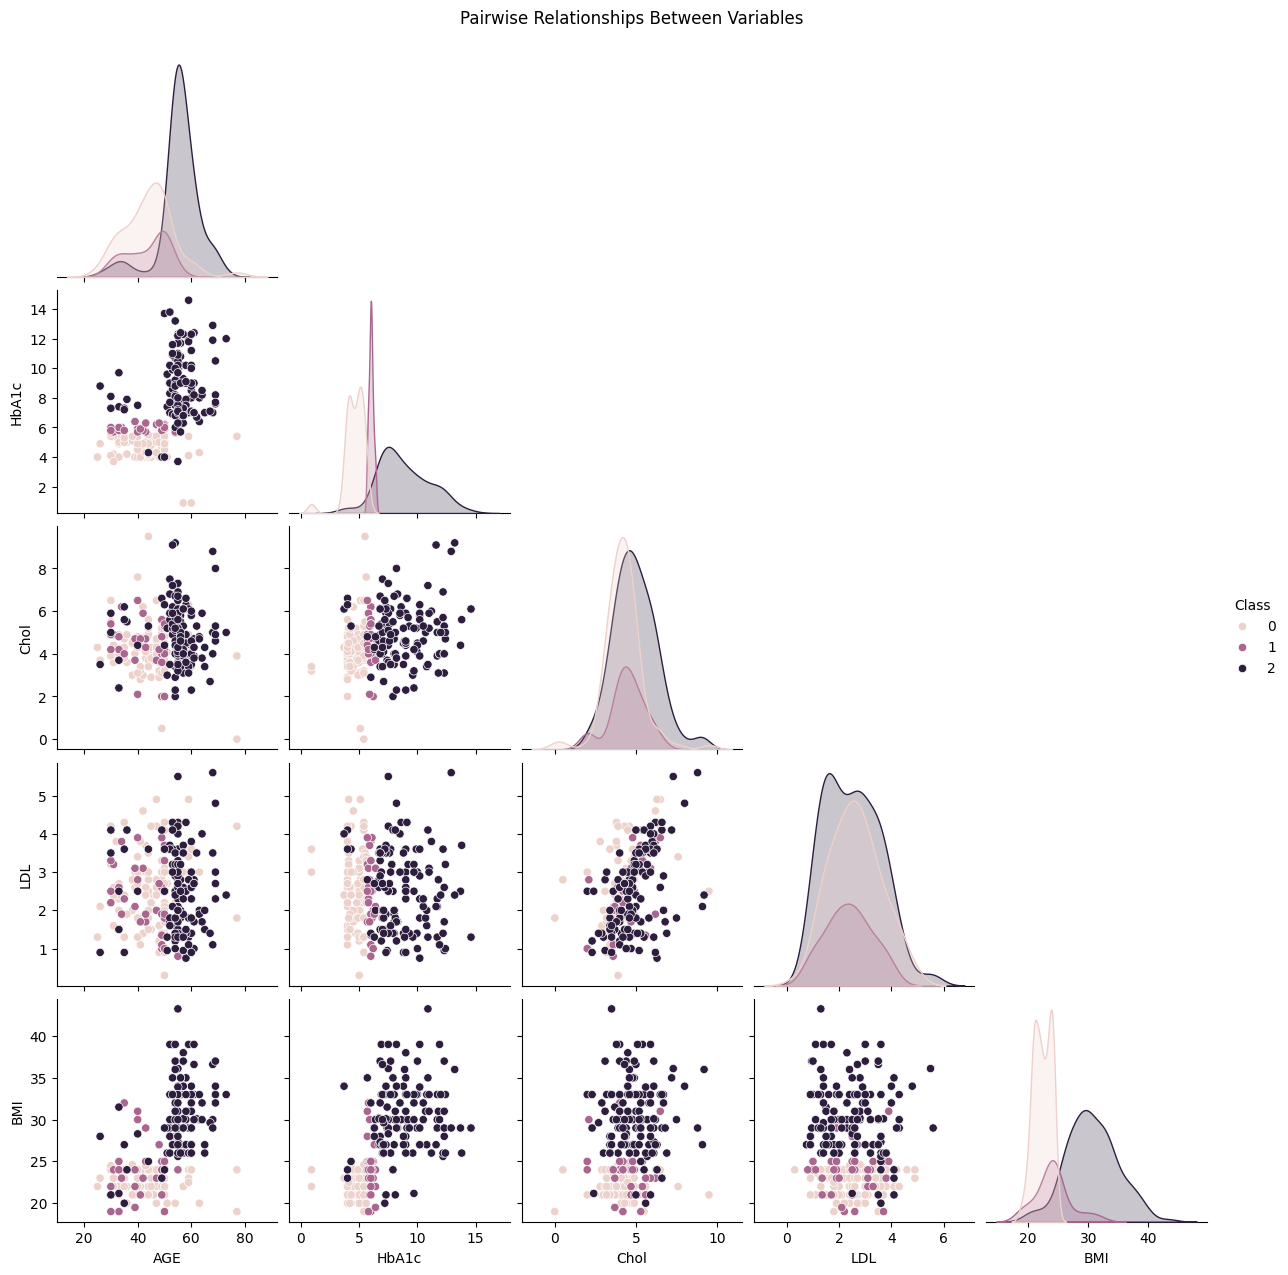

In [14]:
cols = ["AGE", "HbA1c", "Chol", "LDL", "BMI", "Class"]
sns.pairplot(df[cols], hue="Class", diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships Between Variables", y=1.02)
plt.show()

---
## ANOVA: Feature Selection Support

To statistically assess which features significantly vary across diabetes classes, I performed a one-way ANOVA test on each numerical variable.

### Interpretation:

- Features with a **p-value < 0.05** are considered **statistically significant**. These include:
  - **HbA1c**, **BMI**, **AGE**, **TG**, **Chol**, **Urea**, **Cr**, and **VLDL**
- The following features **did not show significant variance across classes**:
  - **LDL** (p = 0.38526)
  - **HDL** (p = 0.61457)

Among all variables, **HbA1c** and **BMI** stand out with the **highest F-statistics** and **near-zero p-values**, confirming their discriminative power.

These findings are consistent with the results observed in the **correlation heatmap**, **EDA**, and **model-based feature importance rankings**, reinforcing the key role of these features in diabetes classification.

In [15]:
numerics = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Class', 'Gender'])

results = []

for col in numerics:
    groups = [g[col].dropna().values for _, g in df.groupby("Class")]
    if all(len(g) > 1 for g in groups):
        f_val, p_val = f_oneway(*groups)
        results.append((col, round(f_val, 3), round(p_val, 5)))
        
pd.DataFrame(results, columns=["Variable", "F-statistic", "p-value"]).sort_values("p-value")

,Variable,F-statistic,p-value
0,AGE,60.368,0.00000
1,BMI,190.565,0.00000
7,TG,14.218,0.00000
5,HbA1c,200.415,0.00000
2,Chol,9.881,0.00007
8,Urea,9.115,0.00015
3,Cr,6.466,0.00182
9,VLDL,3.712,0.02573
6,LDL,0.957,0.38526
4,HDL,0.488,0.61457


---
## Class Imbalance Analysis


### Class Distribution

The bar chart above displays the number of samples per diabetes class in the dataset:

- **Class 0 (Non-Diabetic)**: 96 instances
- **Class 1 (Diabetic)**: 40 instances
- **Class 2 (Pre-Diabetic)**: 128 instances

#### Observations:

- The dataset is **imbalanced**, with **Class 1 (Diabetic)** being significantly underrepresented.
- **Class 2 (Pre-Diabetic)** is the most frequent class, followed by Class 0.
- Class imbalance can negatively affect classification performance, especially for minority classes.

To mitigate this issue during modeling, I considered using **class balancing techniques** such as:
- **Class weighting** (e.g., in logistic regression),
- **Oversampling techniques like SMOTE**,
- and **stratified cross-validation** to preserve class proportions during training and evaluation.

were considered to ensure fair evaluation and robust predictions for all classes.

<Axes: title={'center': 'Class Distribution'}, xlabel='Class'>

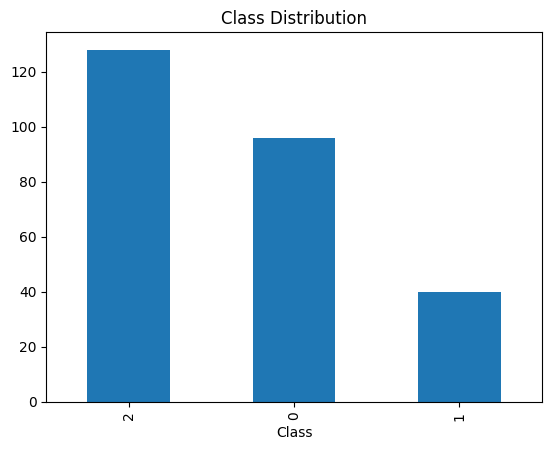

In [16]:
df['Class'].value_counts().plot(kind='bar', title='Class Distribution')

---
## Model Training and Cross-Validation

Because the dataset is small (264 samples), I chose models that are known to work well with limited data and are relatively fast to train.

I used **5-fold stratified cross-validation** to evaluate the models. Stratification ensures that each fold has the same class distribution as the original dataset, which is important given the class imbalance.

The goal is to compare the performance of the following three models:

- **Logistic Regression**  
  A simple and fast linear model. It works well with small datasets and gives a good baseline. I also used **class weighting** to handle the class imbalance.

- **Random Forest**  
  A tree-based model that handles complex relationships between features. It is more flexible than logistic regression and usually performs well even on small datasets.

- **K-Nearest Neighbors (KNN)**  
  A model that classifies samples based on how close they are to others. It doesn’t require training, but can still perform well on small datasets. It’s also useful to see how the model handles class overlap.

To evaluate model performance, I use the **macro F1-score**, which gives equal importance to each class, regardless of how many samples it has. This is important because the classes in the dataset are imbalanced.

### Data Preparation

In this step, I prepare the dataset for model training:

- I separate the dataset into **features (X)** and **target (y)**.
- I split the data into a **training set (70%)** and a **test set 30%**


In [18]:
X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

To compare model performance, I applied 5-fold stratified cross-validation on the training set and computed the macro F1-score for each model.

In [19]:
pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(class_weight='balanced', random_state=42))
    ]),
    
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_macro')
    print(f"{name} - CV F1-score (macro): Mean = {scores.mean():.4f} | Std = {scores.std():.4f}")

Logistic Regression - CV F1-score (macro): Mean = 0.8270 | Std = 0.0903
Random Forest - CV F1-score (macro): Mean = 0.9718 | Std = 0.0310
K-Nearest Neighbors - CV F1-score (macro): Mean = 0.6771 | Std = 0.0335


### Cross-Validation Results (Macro F1-Score)

To evaluate model performance on imbalanced multi-class data, I used **Stratified K-Fold Cross-Validation** with the **macro-averaged F1-score** as the main metric. This metric gives equal importance to each class, making it ideal in the presence of class imbalance.

| Model                | Mean F1-score (Macro) | Std Dev |
|----------------------|-----------------------|---------|
| Logistic Regression  | 0.827                 | 0.0903  |
| Random Forest        | 0.9718                | 0.031   |
| K-Nearest Neighbors  | 0.6771                | 0.0335  |

#### Interpretation:

- **Random Forest** outperforms the other models with the highest mean F1-score and the lowest variance, indicating consistent and reliable classification across folds.
- **Logistic Regression** performs moderately well but with higher variability, suggesting sensitivity to data splits.
- **KNN** performs poorly, likely due to its sensitivity to feature scaling and the class imbalance in the dataset.

Based on these results, I selected **Random Forest** as the most promising classifier for further tuning and testing on the hold-out set.


After selecting Random Forest as the best-performing model, I trained it on the training set and evaluated it on the test set. The results are shown using a classification report and a confusion matrix.


--- Evaluation on Test Set ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      1.00      1.00        12
           2       1.00      0.95      0.97        39

    accuracy                           0.97        80
   macro avg       0.98      0.98      0.98        80
weighted avg       0.98      0.97      0.98        80



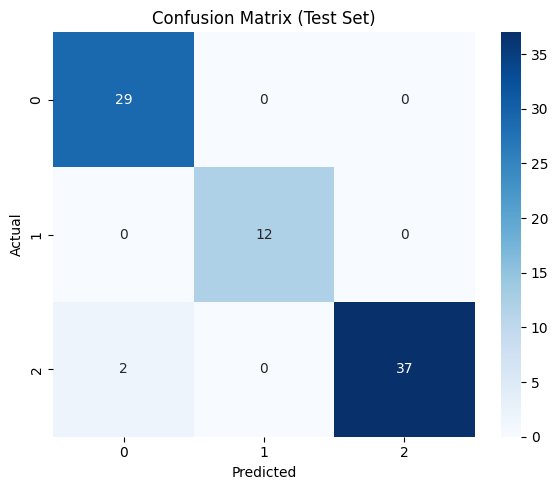

In [20]:
pipelines["Random Forest"].fit(X_train, y_train)

y_pred = pipelines["Random Forest"].predict(X_test)

print("\n--- Evaluation on Test Set ---")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

---
## Conclusion

The final **Random Forest** model, trained **without hyperparameter tuning**, performs exceptionally well on the test set:

- **Accuracy**: 97%
- **Macro F1-score**: 0.98

**Per-Class F1-scores:**
- **Class 0 (Non-Diabetic)**: 0.97
- **Class 1 (Diabetic)**: 1.00
- **Class 2 (Pre-Diabetic)**: 0.97

The **confusion matrix** confirms the model's robustness, with **only 2 misclassified samples** (Class 2 predicted as Class 0). No confusion is observed for Class 1, which had previously been underrepresented in the dataset.

These results suggest that the Random Forest model is well-suited for practical use and could be deployed in a simple user interface such as a **Streamlit app** for real-time predictions.

---
## Export the Model

To make the trained Random Forest model reusable for deployment (e.g., in a Streamlit app), I saved it using `joblib`.

In [21]:
joblib.dump(pipelines["Random Forest"], "rf_model.pkl")

['rf_model.pkl']

---
## Final Remarks

This project demonstrated a complete end-to-end pipeline for multiclass diabetes classification. Using clinical features, I trained and evaluated several models, with Random Forest achieving excellent performance on both cross-validation and the test set.

While the results are promising, future improvements could include:
- Hyperparameter tuning (e.g., GridSearch)
- Feature engineering or selection
- Testing on a larger or external dataset